In [1]:
%matplotlib notebook


<IPython.core.display.Javascript object>


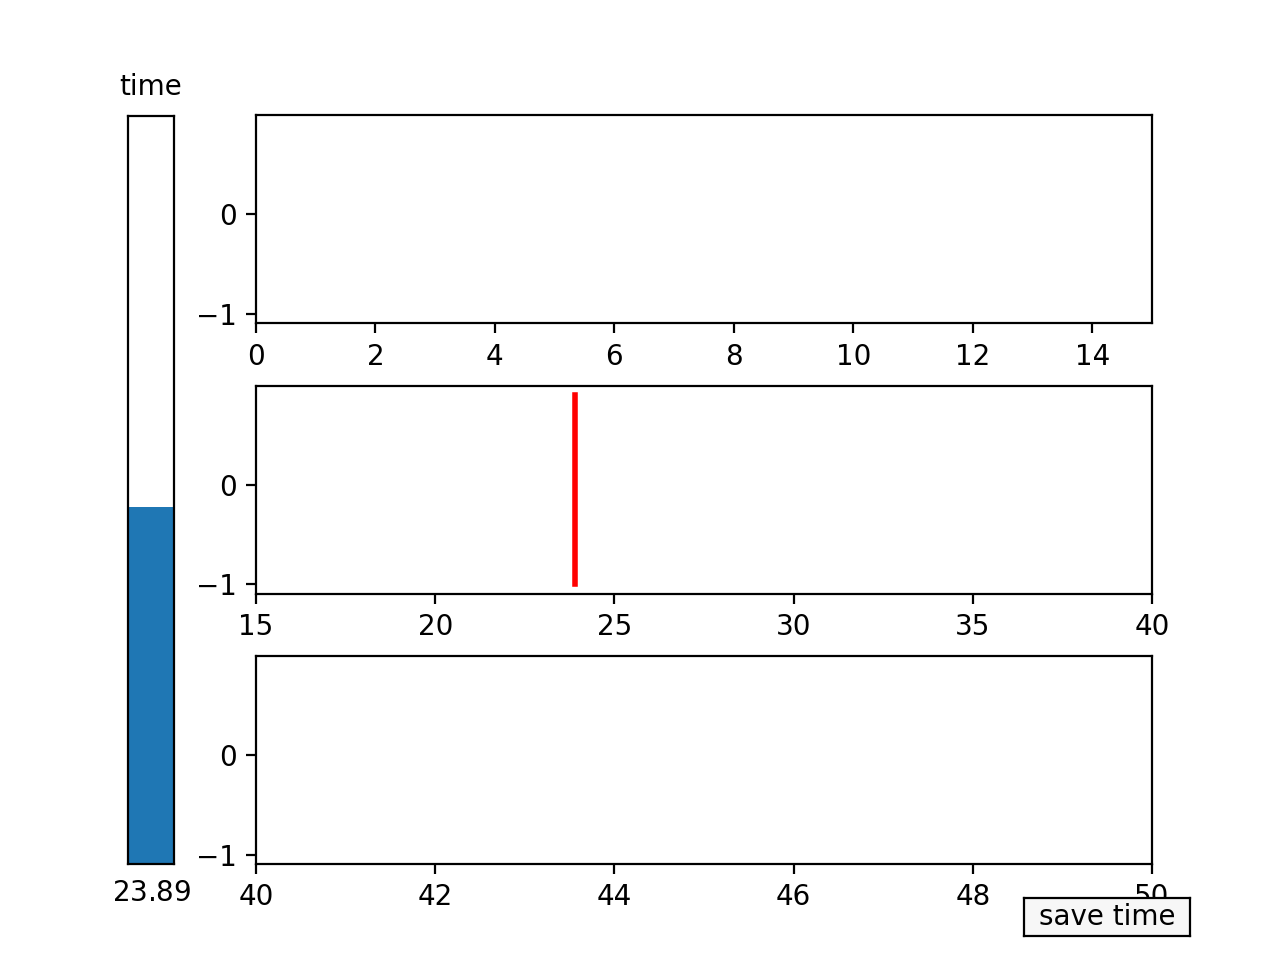

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

fig, ax = plt.subplots(3,1)
plt.subplots_adjust(left=0.2, bottom=0.1, hspace = 0.3)

test_list = []
s0 = 0

t1 = np.arange(-1, 1, 0.1)
t2 = np.arange(-1, 1, 0.1)
t2 = np.arange(-1, 1, 0.1)

s1 = s0*np.ones(np.shape(t1))
s2 = s0*np.ones(np.shape(t2))
s3 = s0*np.ones(np.shape(t2))

l1 = ax[0].plot(s1, t1, lw=2, color='red')[0]
l2 = ax[1].plot(s2, t2, lw=2, color='red')[0]
l3 = ax[2].plot(s2, t2, lw=2, color='red')[0]



ax[0].set_xlim(0,15)
ax[1].set_xlim(15,40)
ax[2].set_xlim(40,50)

axtime = plt.axes([0.1, 0.1, 0.036, 0.779])
stime = Slider(axtime, 'time', 0, 50., valinit=s0, orientation="vertical")

def update(val):
    l1.set_xdata(val*np.ones(np.shape(t1)))
    l2.set_xdata(val*np.ones(np.shape(t2)))
    l3.set_xdata(val*np.ones(np.shape(t2)))

    fig.canvas.draw_idle()

stime.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.13, 0.04])
button = Button(resetax, 'save time', color='0.97', hovercolor='0.79')

def save(event):
    test_list.append(stime.val)
    print(test_list)
    
    #print("Amplitude: ",  sfreq.val)

button.on_clicked(save)

plt.show()

In [149]:
print(test_list)

[41.40675144415917, 41.40675144415917]


<IPython.core.display.Javascript object>


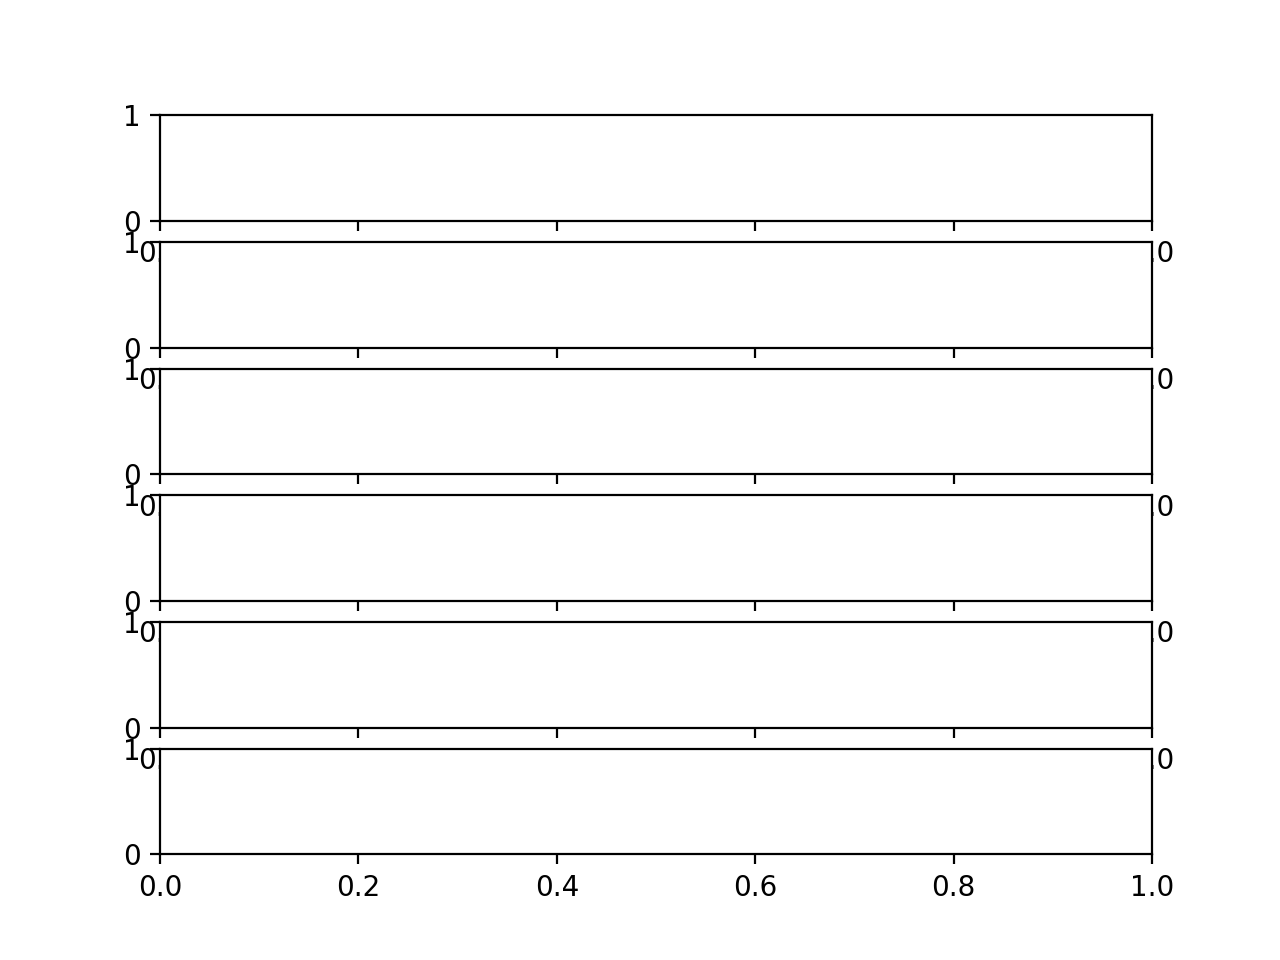

In [150]:
fig, ax = plt.subplots(nrows = 6)
plt.show()


<IPython.core.display.Javascript object>


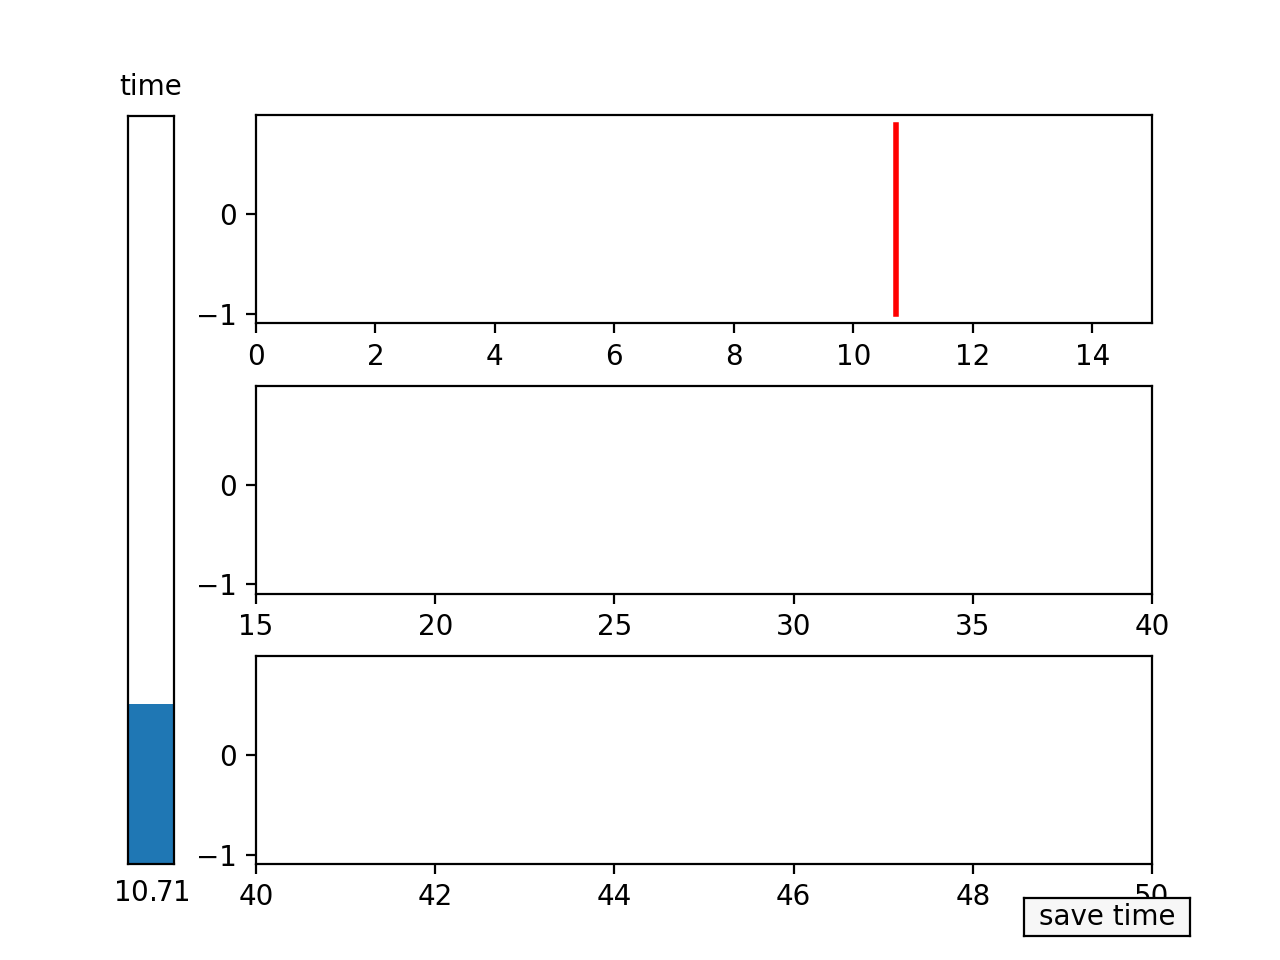

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button



<IPython.core.display.Javascript object>


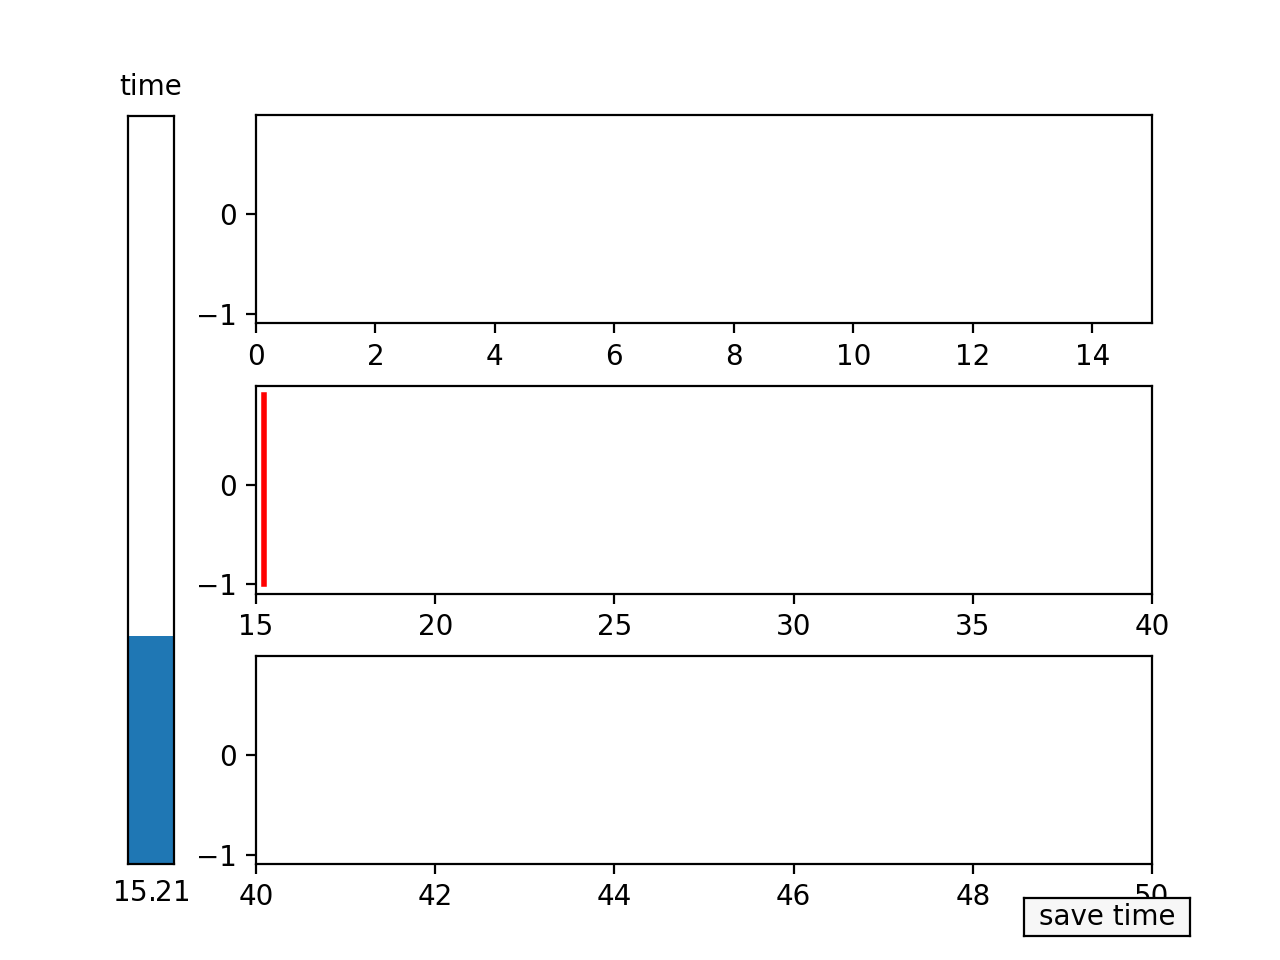

In [8]:
transits = 3
fig, ax = plt.subplots(nrows = transits)
plt.subplots_adjust(left=0.2, bottom=0.1, hspace = 0.3)

problem_times = []

t_init = 0

ts=[]
ys=[]
ls=[]
tvals = [[0,15],[15,40],[40,50]]
for ii in range(0, transits):
    tmin,tmax = tvals[ii]

    y=np.arange(-1, 1, 0.1)
    ys.append(y)

    t = t_init*np.ones(np.shape(y))
    ts.append(t)

    ls.append(ax[ii].plot(ts[ii], ys[ii], lw=2, color='red')[0])


    ax[ii].set_xlim(tmin,tmax)


axtime = plt.axes([0.1, 0.1, 0.036, 0.779])
stime = Slider(axtime, 'time', 0, 50., valinit=s0, orientation="vertical")

def update(val):
    for ii in range(0, transits):
        ls[ii].set_xdata(val*np.ones(np.shape(ys[ii])))


    fig.canvas.draw_idle()

stime.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.13, 0.04])
button = Button(resetax, 'save time', color='0.97', hovercolor='0.79')

def save(event):
    if stime.val not in problem_times:
        problem_times.append(stime.val)


button.on_clicked(save)

plt.show()

<IPython.core.display.Javascript object>


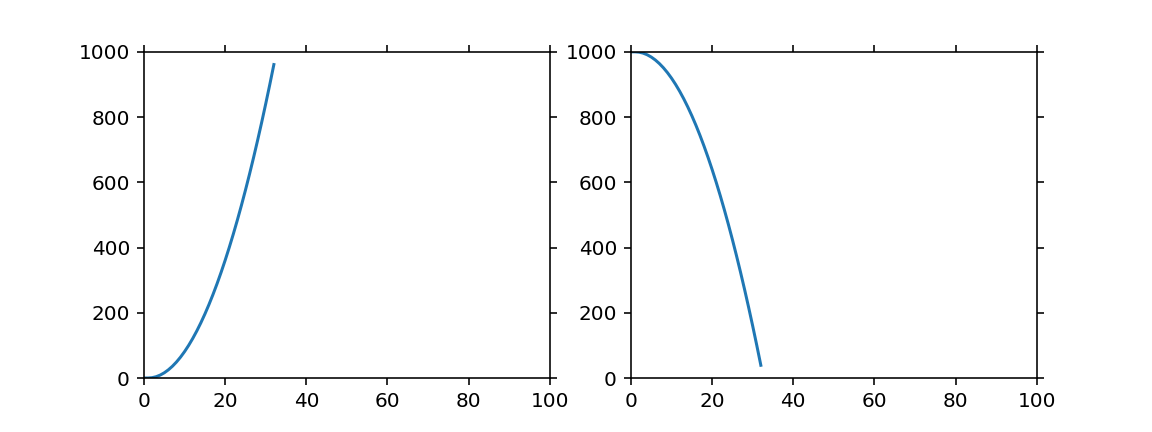

<IPython.core.display.Javascript object>


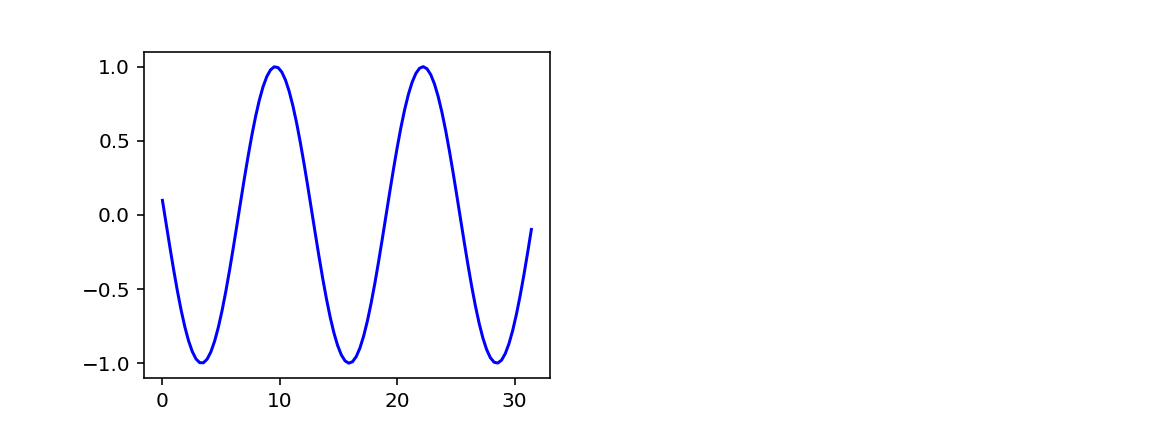

In [12]:
# Tests for dynamic plot updates
#-------------------------------
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

x = np.linspace(0, 10*np.pi, 100)
y = np.sin(x)

# The really important command for interactive plot updating
plt.ion()

# sizing of the plots figure sizes 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 3

# Two figures 
# -----------
fig1 = plt.figure(1)
fig2 = plt.figure(2)

# first figure with two plot-areas with axes 
# --------------------------------------------
ax1_1 = fig1.add_subplot(121)
ax1_2 = fig1.add_subplot(122)

fig1.canvas.draw()

# second figure with just one plot area with axes
# -------------------------------------------------
ax2 = fig2.add_subplot(121)
line1, = ax2.plot(x, y, 'b-')
fig2.canvas.draw()

z= 32
b = np.zeros([1])
c = np.zeros([1])
c[0] = 1000

for i in range(z):
    # update data 
    phase = np.pi / z * i 
    line1.set_ydata(np.sin(0.5 * x + phase))
    b = np.append(b, [i**2])
    c = np.append(c, [1000.0 - i**2])
    
    # re-plot area 1 of fig1  
    ax1_1.clear()
    ax1_1.set_xlim (0, 100)
    ax1_1.set_ylim (0, 1000)
    ax1_1.plot(b)
    
    # re-plot area 2 of fig1  
    ax1_2.clear()
    ax1_2.set_xlim (0, 100)
    ax1_2.set_ylim (0, 1000)
    ax1_2.plot(c)
    
    # redraw fig 1 
    fig1.canvas.draw()

    # redraw fig 2 with updated data  
    fig2.canvas.draw()
    
    time.sleep(0.1)